In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
x,y =make_moons(100,noise=0.25,random_state=2)

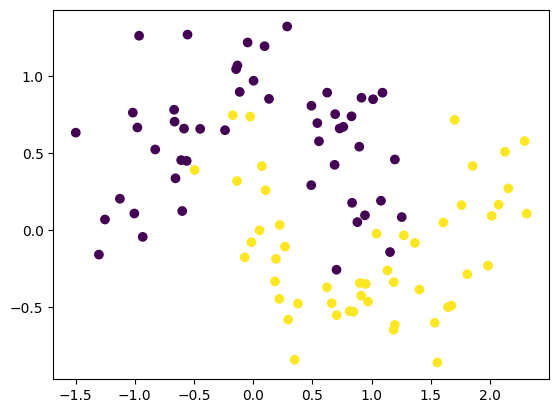

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()


In [33]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(x, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 16s 2ms/step


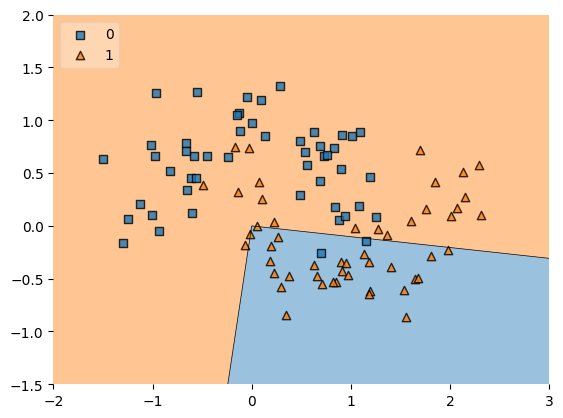

In [38]:
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [39]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

NameError: name 'history1' is not defined

regularization model creted the l1 and l2

In [42]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
adam =Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history2=model2.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 15s 2ms/step


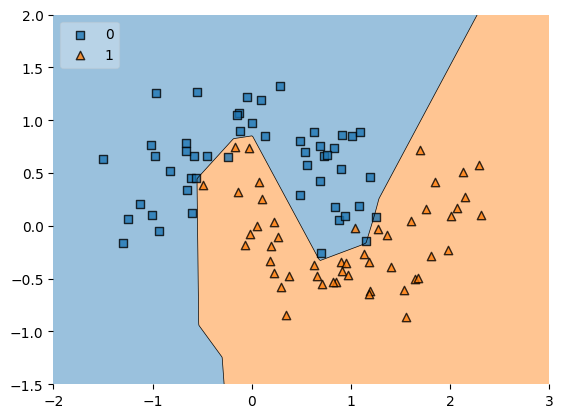

In [44]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

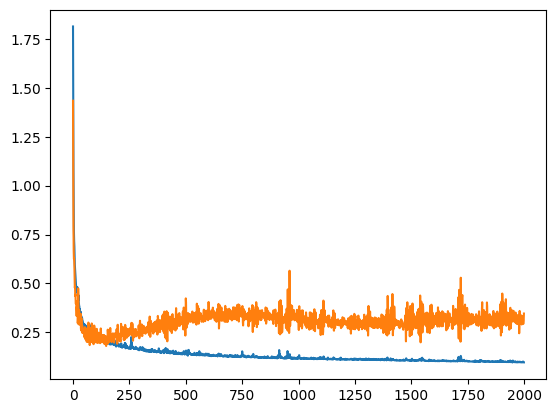

In [45]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [46]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

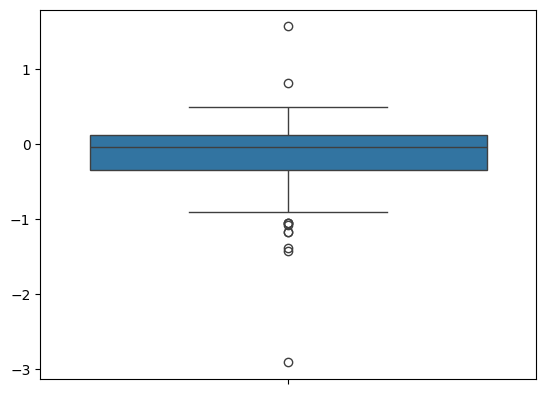

In [50]:
import seaborn as sns
sns.boxplot(model1_weight_layer1)

<Axes: >

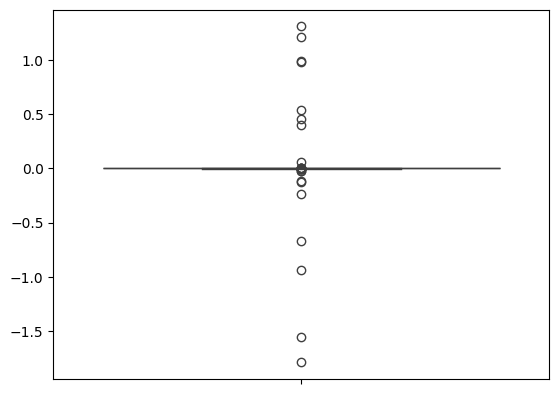

In [51]:
sns.boxplot(model2_weight_layer1)

In [52]:
model1_weight_layer1.min()

-2.9151182

In [54]:
model2_weight_layer1.min()

-1.791244

<ipython-input-55-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-55-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

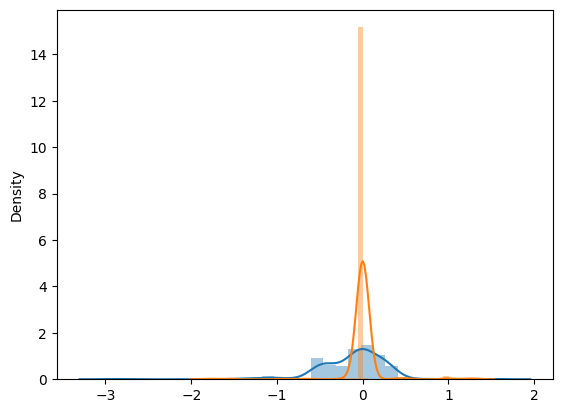

In [55]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [56]:
model1.get_weights()[0].reshape(256)

array([-5.61733603e-01, -4.79659945e-01, -3.47022444e-01, -2.40265101e-01,
       -1.56811569e-02, -6.87990412e-02,  5.64728677e-02, -3.70602995e-01,
       -4.75264221e-01, -3.75536308e-02,  1.88455861e-02, -3.16454272e-04,
       -3.62649918e-01, -2.69202977e-01, -4.65799183e-01, -4.78108644e-01,
       -5.00303030e-01, -2.18519524e-01,  1.81524411e-01,  3.15402597e-02,
       -5.27390957e-01, -2.54920963e-02,  2.55024284e-01,  2.78700769e-01,
       -4.76787478e-01, -5.33480763e-01, -1.96477491e-02,  2.28787735e-01,
        2.98225787e-02, -5.23265243e-01, -1.14443891e-01, -2.02709660e-01,
        1.18663749e-02, -2.39244148e-01,  2.46474981e-01, -4.14344579e-01,
       -1.05101325e-01,  2.28806928e-01, -3.94317135e-02, -4.52629566e-01,
       -5.58418095e-01, -1.30022481e-01,  2.87403256e-01, -1.03351250e-01,
       -2.39535104e-02, -9.70249251e-03,  2.55087852e-01, -1.59065545e-01,
        2.35918164e-01, -4.68387231e-02, -7.89554566e-02, -1.19531646e-01,
        7.19991848e-02,  